In [1]:
import scipy.io

In [12]:
test = scipy.io.loadmat(r'D:\test.mat', simplify_cells=True)

In [13]:
test['None']

MatlabOpaque([(b'test', b'MCOS', b'table', array([3707764736,          2,          1,          1,          1,
                              1], dtype=uint32))                                                             ],
             dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')])

In [9]:
import pandas as pd

In [10]:
test2 = pd.read_csv(r'D:\test2.csv')

In [11]:
test2

,hi,ho,lets
0,0.964889,0.957167,0.141886
1,0.157613,0.485376,0.421761
2,0.970593,0.800280,0.915736


In [16]:
import numpy as np
import scipy.io

In [15]:
F = np.load(r'D:\RH_local\data\BMI_cage_1511_4\mouse_1511L\20230201\analysis_data\suite2p\plane0\F.npy')

In [19]:
lv = scipy.io.loadmat(r'D:/RH_local/data/BMI_cage_1511_4/mouse_1511L/20230201/analysis_data/logger_valsROIs.mat', simplify_cells=True)['logger_valsROIs']

In [51]:
import bnpm.h5_handling

In [56]:
bs = bnpm.h5_handling.simple_load(r'D:/RH_local/data/BMI_cage_1511_4/mouse_1511L/20230201/analysis_data/baselineStuff.mat', return_lazy=False)['baselineStuff']

In [57]:
bs.keys()

dict_keys(['Fs_frameRate', 'MC', 'ROIs', 'cellNumsToUse', 'directory', 'factor_to_use', 'file_baseName', 'framesForMeanImForMC', 'frames_perFile', 'frames_totalExpected'])

In [58]:
bs['ROIs'].keys()

dict_keys(['SPT_idxNaN', 'SPT_warped_idxNaN', 'cellWeightings', 'cellWeightings_tall', 'cellWeightings_tall_warped', 'cell_size_max', 'idxBounds_ROI', 'mask_center', 'num_cells', 'spatial_footprints_all', 'spatial_footprints_tall', 'spatial_footprints_tall_warped', 'spatial_footprints_tall_warped_weighted', 'spatial_footprints_tall_weighted', 'spatial_footprints_warped_all', 'spatial_footprints_warped_weighted_all'])

In [68]:
bs['ROIs']['spatial_footprints_tall_warped'][3][:230]

array([2.19373249e-01, 3.88600864e-02, 1.80512472e-01, 3.40629779e-01,
       5.13992842e-02, 6.04300830e-03, 2.48274382e-01, 1.41349398e-01,
       9.60827230e-03, 1.90474204e-01, 3.52749985e-01, 9.43174620e-02,
       1.53329491e-02, 2.40614627e-01, 2.24759262e-01, 3.00466529e-03,
       2.08574168e-01, 4.33849369e-01, 1.48812765e-01, 5.62018208e-02,
       2.24251543e-01, 9.82075318e-02, 4.08264253e-01, 3.19493965e-01,
       1.44559968e-01, 4.70274321e-01, 2.02941012e-01, 2.20794927e-01,
       5.09924396e-01, 1.89543899e-01, 2.36865538e-01, 6.19217327e-01,
       4.29964604e-01, 5.07736437e-01, 3.74524310e-01, 2.05056933e-01,
       6.39348535e-01, 8.00574445e-01, 6.15252656e-01, 2.11940766e-01,
       1.89939828e-02, 7.23413800e-01, 1.31240610e+00, 5.58473071e-01,
       9.81949157e-01, 1.69110173e+00, 6.49083713e-01, 1.08231448e+00,
       1.63481767e+00, 5.49499395e-01, 1.04457071e+00, 1.41241121e+00,
       4.44656034e-01, 9.76095159e-01, 1.32407223e+00, 4.27931165e-01,
      

In [66]:
bs['ROIs']['spatial_footprints_tall_warped']

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
                   nan,            nan,            nan],
       [5.29000000e+02, 5.29000000e+02, 5.30000000e+02, ...,
                   nan,            nan,            nan],
       [2.06000000e+02, 2.07000000e+02, 2.05000000e+02, ...,
                   nan,            nan,            nan],
       [2.19373249e-01, 3.88600864e-02, 1.80512472e-01, ...,
                   nan,            nan,            nan]])

In [67]:
fov = np.zeros((512,1024))

In [72]:
fov[
    bs['ROIs']['spatial_footprints_tall_warped'][2][:180].astype(np.int64),
    bs['ROIs']['spatial_footprints_tall_warped'][1][:180].astype(np.int64)
] = bs['ROIs']['spatial_footprints_tall_warped'][3][:180]

<IPython.core.display.Javascript object>


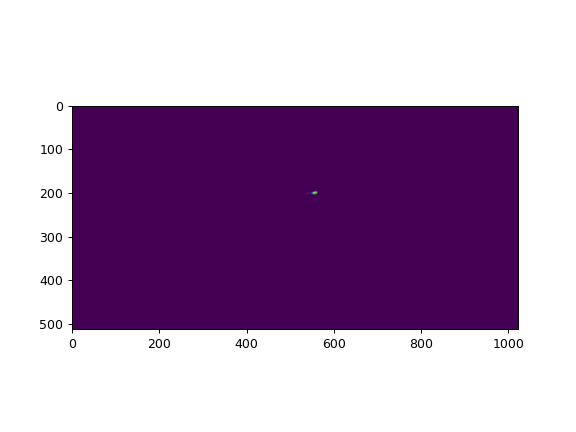

In [80]:
%matplotlib notebook

plt.figure()
plt.imshow(fov)

In [32]:
iscell = np.load(r'D:/RH_local/data/BMI_cage_1511_4/mouse_1511L/20230111/analysis_data/iscell_NN_tqm.npy')

In [36]:
import matplotlib.pyplot as plt

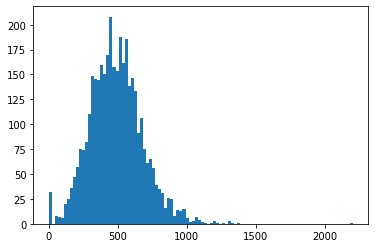

In [43]:
plt.figure()
plt.hist(F.mean(1), 100);
# plt.hist(np.nanmean(lv, axis=0), 100);

In [45]:
stat = np.load(r'D:\RH_local\data\BMI_cage_1511_4\mouse_1511L\20230111\analysis_data\suite2p\plane0\stat.npy', allow_pickle=True)

In [ ]:
stat[iscell][0]['lam']

In [78]:
fov2 = np.zeros((512,1024))

fov2[
    stat[iscell][0]['ypix'].astype(np.int64),
    stat[iscell][0]['xpix'].astype(np.int64),
] = stat[iscell][0]['lam'],


<IPython.core.display.Javascript object>


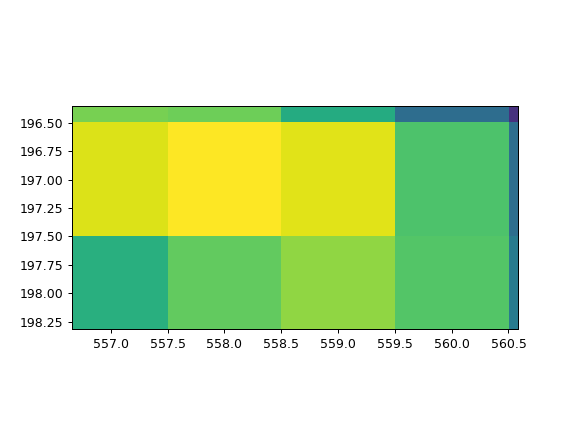

In [79]:
%matplotlib notebook

plt.figure()
plt.imshow(fov2)